In [230]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
warnings.filterwarnings('ignore')
%matplotlib inline

# 경향성이 있는 그래프의 선형적으로 증가할 수 있게 하는 함수 
def trend(time, slope = 0):
    return time * slope

# x: 시간축인 함수 plot 함수
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

# 120개씩 자르는 함수 
def univariate_data(dataset, start_index, end_index):
    data = []
    history_size = 120
    start_index = start_index + history_size


    for i in range(start_index, end_index, 120): # 0
        indices = range(i - history_size, i) # [0 - 120] , [120 - 240] ...
        # Reshape data from (history_size,) to (history_size, 1)

        data.append(dataset[indices])

    return np.array(data)

for i in range(1,9):
    globals()['df_'+str(i) ]= pd.read_csv('./temperature_csv_file/temp_df_{}.csv'.format(i), encoding = 'cp949')

df_all = pd.concat([df_1, df_2], axis = 0)
df_all = pd.concat([df_all, df_3], axis = 0)
df_all = pd.concat([df_all, df_4], axis = 0)
df_all = pd.concat([df_all, df_5], axis = 0)
df_all = pd.concat([df_all, df_6], axis = 0)
df_all = pd.concat([df_all, df_7], axis = 0)
df_all = pd.concat([df_all, df_8], axis = 0)

df_all = df_all[:601800].reset_index().drop(columns = ['index'], axis = 0)

for i in range(1,8):
    globals()['df_'+str(i)+'_tmp'] = df_all[85920*(i-1):85920*i].reset_index().drop(columns=['index'], axis=0)

N = 6
dx = (600 - df_1_tmp['TEMP'].mean()) / N # 전체 데이터에 대한 증가율 : 56.3785
dx_minute = dx / (len(df_1_tmp)-1) # 분당 증가율

time = np.arange(85920)
slope = dx_minute * 2

def trend(time, slope = 0):
    return time * slope

for i in range(1,8):
    mean = globals()['df_'+str(i)+'_tmp']['TEMP'].mean()
    diff  = 261.7292228119181 - mean
    globals()['df_'+str(i)+'_tmp']['TEMP'] += diff

for i in range(8,12):
    globals()['df_'+str(i)+'_tmp'] = globals()['df_'+str(i-5)+'_tmp'].copy()

for i in range(2,12):
    series = np.round(trend(time, slope = slope) + globals()['df_'+str(i)+'_tmp']['TEMP'] + dx*(i-2), 3)
    globals()['df_'+str(i)+'_tmp']['TEMP'] = series

for i in range(1,12):
    data = {'MEAN_TEMP' : [], 'STD' : [], 'MIN' : [], 'MAX' : [], 'SKEW' : [], 'KURT' : [], 'MEDIAN':[], '25%' : [], '75%' : [], 'Group' : []}

    for j in range(0,85890,30):
        temp = globals()['df_'+str(i)+'_tmp']['TEMP'][j:j+60]
        MEAN = np.round(np.mean(temp), 3)
        MIN = np.min(temp)
        MAX = np.max(temp)
        STD = np.std(temp)
        median = temp.median()
        skew = temp.skew()
        kurt = temp.kurt()
        a, b = np.percentile(temp, q = [25,75])

        data['Group'].append(i)
        data['MEAN_TEMP'].append(MEAN)
        data['MIN'].append(MIN)
        data['MAX'].append(MAX)
        data['STD'].append(STD)
        data['SKEW'].append(skew)
        data['KURT'].append(kurt)
        data['MEDIAN'].append(np.round(median,3))
        data['25%'].append(np.round(a,3))
        data['75%'].append(np.round(b,3))

    globals()['group_'+str(i)] = pd.DataFrame(data)


print(len(group_1))
TIME = pd.DataFrame({'TIME' : np.arange(31493)})
tmp = pd.concat([group_1, group_2], axis = 0)
tmp = pd.concat([tmp, group_3], axis = 0)
tmp = pd.concat([tmp, group_4], axis = 0)
tmp = pd.concat([tmp, group_5], axis = 0)
tmp = pd.concat([tmp, group_6], axis = 0)
tmp = pd.concat([tmp, group_7], axis = 0)
tmp = pd.concat([tmp, group_8], axis = 0)
tmp = pd.concat([tmp, group_9], axis = 0)
tmp = pd.concat([tmp, group_10], axis = 0)
tmp = pd.concat([tmp, group_11], axis = 0)
tmp = tmp.reset_index()
tmp = pd.concat([tmp, TIME], axis = 1)
tmp.drop(columns = ['index'], inplace = True)
df = tmp
df

tmp = np.arange(945120)
TIME = pd.DataFrame({'TIME' : tmp})
df_temp_all = pd.concat([df_1_tmp, df_2_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_3_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_4_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_5_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_6_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_7_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_8_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_9_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_10_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_11_tmp], axis = 0)
df_temp_all = df_temp_all.reset_index().drop(columns = ['date', 'index','kst'])
df_temp_all = pd.concat([df_temp_all,TIME], axis = 1)
df_temp_all

2863


,TEMP,TIME
0,286.797,0
1,287.082,1
2,285.938,2
3,285.772,3
4,286.357,4
...,...,...
945115,932.228,945115
945116,931.950,945116
945117,931.836,945117
945118,932.184,945118


In [241]:
temperature_1 = pd.read_csv('./temperature_csv_file/temp_df_1.csv')
temperature_1

,date,kst,TEMP
0,20230101,9:00,286.797
1,20230101,9:00,287.082
2,20230101,9:01,285.938
3,20230101,9:01,285.772
4,20230101,9:02,286.357
...,...,...,...
88189,20230131,23:57,274.692
88190,20230131,23:58,274.674
88191,20230131,23:58,274.588
88192,20230131,23:59,274.511


In [245]:
gps_1 = pd.read_csv('./gps/h2451_v1_geo_20230101_20230114.csv')
gps_1 = gps_1[1080:]

gps_1 = gps_1.iloc[:, 2:4]
gps_1

,longitude,latitude
1080,163.427467,28.531400
1081,163.424783,28.531967
1082,163.421917,28.532567
1083,163.419217,28.532933
1084,163.416517,28.533467
...,...,...
40313,148.841500,32.539383
40314,148.844467,32.539850
40315,148.846450,32.540283
40316,148.849433,32.540717


In [246]:
gps_2 = pd.read_csv('./gps/h2451_v1_geo_20230115_20230131.csv')
gps_2 = gps_2.iloc[:, 2:4]
gps_2

,longitude,latitude
0,148.855517,32.541667
1,148.858467,32.542117
2,148.861417,32.542617
3,148.864300,32.543117
4,148.867400,32.543450
...,...,...
48951,-81.480883,6.903217
48952,-81.478700,6.903250
48953,-81.476450,6.903300
48954,-81.474217,6.903317


In [12]:
39238 + 48956

88194

In [247]:
gps = pd.concat([gps_1, gps_2], axis = 0).reset_index().drop(columns = 'index')
gps


,longitude,latitude
0,163.427467,28.531400
1,163.424783,28.531967
2,163.421917,28.532567
3,163.419217,28.532933
4,163.416517,28.533467
...,...,...
88189,-81.480883,6.903217
88190,-81.478700,6.903250
88191,-81.476450,6.903300
88192,-81.474217,6.903317


In [248]:
df_1 = pd.concat([temperature_1, gps], axis = 1)
df_1

,date,kst,TEMP,longitude,latitude
0,20230101,9:00,286.797,163.427467,28.531400
1,20230101,9:00,287.082,163.424783,28.531967
2,20230101,9:01,285.938,163.421917,28.532567
3,20230101,9:01,285.772,163.419217,28.532933
4,20230101,9:02,286.357,163.416517,28.533467
...,...,...,...,...,...
88189,20230131,23:57,274.692,-81.480883,6.903217
88190,20230131,23:58,274.674,-81.478700,6.903250
88191,20230131,23:58,274.588,-81.476450,6.903300
88192,20230131,23:59,274.511,-81.474217,6.903317


In [249]:
df_1.to_csv('./temp_add_gps/temp_and_gps_1.csv')


In [142]:
temp_path = './temperature_csv_file/'
gps_path = './gps/'
gps_list = os.listdir(gps_path)
temp_list = os.listdir(temp_path)
print("1 index of file")
print("Temperature Length : ", len(temperature_1), ", 1 Gps File Length : ", len(gps_1), ", 2 Gps File Length : " , len(gps_2))
print("Sum of GPS FIle length is same with Temperature File : ", len(temperature_1) == (len(gps)))

for idx in range(1,7):
    temp_file = pd.read_csv(os.path.join(temp_path + temp_list[idx]))
    gps_file_1, gps_file_2 = pd.read_csv(os.path.join(gps_path + gps_list[idx*2])), pd.read_csv(os.path.join(gps_path + gps_list[idx*2 + 1]))
    print(f"{idx+1} index of file")
    print("Temperature Length : ", len(temp_file), ", 1 Gps File Length : ", len(gps_file_1), ", 2 Gps File Length : " , len(gps_file_2))
    print("Sum of GPS FIle length is same as Temperature File : ", len(temp_file) == (len(gps_file_1) + len(gps_file_2)))

1 index of file
Temperature Length :  88194 , 1 Gps File Length :  40242 , 2 Gps File Length :  48940
Sum of GPS FIle length is same with Temperature File :  True
2 index of file
Temperature Length :  80640 , 1 Gps File Length :  40320 , 2 Gps File Length :  40320
Sum of GPS FIle length is same as Temperature File :  True
3 index of file
Temperature Length :  89276 , 1 Gps File Length :  40316 , 2 Gps File Length :  48960
Sum of GPS FIle length is same as Temperature File :  True
4 index of file
Temperature Length :  86396 , 1 Gps File Length :  40316 , 2 Gps File Length :  46080
Sum of GPS FIle length is same as Temperature File :  True
5 index of file
Temperature Length :  89182 , 1 Gps File Length :  40242 , 2 Gps File Length :  48940
Sum of GPS FIle length is same as Temperature File :  True
6 index of file
Temperature Length :  86390 , 1 Gps File Length :  40314 , 2 Gps File Length :  46076
Sum of GPS FIle length is same as Temperature File :  True
7 index of file
Temperature Leng

In [177]:
temp_path = './temperature_csv_file/'
gps_path = './gps/'
gps_list = os.listdir(gps_path)
temp_list = os.listdir(temp_path)
for idx in range(1,7):
    temp_file = pd.read_csv(os.path.join(temp_path + temp_list[idx]))
    gps_file_1, gps_file_2 = pd.read_csv(os.path.join(gps_path + gps_list[idx*2])), pd.read_csv(os.path.join(gps_path + gps_list[idx*2 + 1]))

    print(temp_list[idx], gps_list[idx*2], gps_list[idx*2 + 1])
    print("Temperature Length : ", len(temp_file), ", 1 Gps File Length : ", len(gps_file_1), ", 2 Gps File Length : " , len(gps_file_2))

    gas = pd.concat([gps_file_1.loc[:, ['longitude','latitude']], gps_file_2.loc[:, ['longitude','latitude']]], axis = 0).reset_index().drop(columns = 'index')
    df = pd.concat([temp_file, gas], axis = 1)
    df.to_csv('./temp_add_gps/temp_and_gps_{}.csv'.format(idx+1))

temp_df_2.csv h2451_v1_geo_20230201_20230214.csv h2451_v1_geo_20230215_20230228.csv
Temperature Length :  80640 , 1 Gps File Length :  40320 , 2 Gps File Length :  40320
temp_df_3.csv h2451_v1_geo_20230301_20230314.csv h2451_v1_geo_20230315_20230331.csv
Temperature Length :  89276 , 1 Gps File Length :  40316 , 2 Gps File Length :  48960
temp_df_4.csv h2451_v1_geo_20230401_20230414.csv h2451_v1_geo_20230415_20230430.csv
Temperature Length :  86396 , 1 Gps File Length :  40316 , 2 Gps File Length :  46080
temp_df_5.csv h2451_v1_geo_20230501_20230514.csv h2451_v1_geo_20230515_20230531.csv
Temperature Length :  89182 , 1 Gps File Length :  40242 , 2 Gps File Length :  48940
temp_df_6.csv h2451_v1_geo_20230601_20230614.csv h2451_v1_geo_20230615_20230630.csv
Temperature Length :  86390 , 1 Gps File Length :  40314 , 2 Gps File Length :  46076
temp_df_7.csv h2451_v1_geo_20230701_20230714.csv h2451_v1_geo_20230715_20230731.csv
Temperature Length :  80640 , 1 Gps File Length :  40320 , 2 Gps F

In [180]:
temp_path = './temperature_csv_file/'
gps_path = './gps/'
gps_list = os.listdir(gps_path)
temp_list = os.listdir(temp_path)
idx = 7
temp_file = pd.read_csv(os.path.join(temp_path + temp_list[idx]))
gps_file_1 = pd.read_csv(os.path.join(gps_path + gps_list[-1]))
temp_file

,date,kst,TEMP
0,20230801,0:00,285.057
1,20230801,0:00,285.134
2,20230801,0:01,285.324
3,20230801,0:01,285.372
4,20230801,0:02,285.743
...,...,...,...
1075,20230801,8:57,280.894
1076,20230801,8:58,280.625
1077,20230801,8:58,280.475
1078,20230801,8:59,280.545


In [182]:
gps_file_1[:1080]

,ds_timeindex,ds_timestamp,longitude,latitude
0,2023-08-01 00:00:00,1690848000000,-9.592067,47.378967
1,2023-08-01 00:00:30,1690848030000,-9.588950,47.379967
2,2023-08-01 00:01:00,1690848060000,-9.586033,47.381483
3,2023-08-01 00:01:30,1690848090000,-9.583117,47.383017
4,2023-08-01 00:02:00,1690848120000,-9.580183,47.384633
...,...,...,...,...
1075,2023-08-01 08:57:30,1690880250000,-6.299650,48.919033
1076,2023-08-01 08:58:00,1690880280000,-6.296717,48.920567
1077,2023-08-01 08:58:30,1690880310000,-6.293533,48.922100
1078,2023-08-01 08:59:00,1690880340000,-6.290550,48.923617


In [240]:
idx = 0
path_temp_gps = './temp_add_gps/'
list_temp_gps = os.listdir(path_temp_gps)
df = pd.read_csv(os.path.join(path_temp_gps + list_temp_gps[idx]))
df

,Unnamed: 0,date,kst,TEMP,longitude,latitude
0,0,20230101,9:00,286.797,-81.469583,6.903383
1,1,20230101,9:00,287.082,-81.467367,6.903400
2,2,20230101,9:01,285.938,-81.465117,6.903433
3,3,20230101,9:01,285.772,-81.462883,6.903483
4,4,20230101,9:02,286.357,-81.460650,6.903517
...,...,...,...,...,...,...
88189,88189,20230131,23:57,274.692,NaN,NaN
88190,88190,20230131,23:58,274.674,NaN,NaN
88191,88191,20230131,23:58,274.588,NaN,NaN
88192,88192,20230131,23:59,274.511,NaN,NaN


In [163]:
48960 + 40316

89276

In [185]:
gas = pd.concat([gps_file_1.iloc[:, 2:4], gps_file_2.iloc[:, 2:4]], axis = 0).reset_index().drop(columns = 'index')

df = pd.concat([temp_file, gps_file_1[:1080].loc[:, ['longitude','latitude']]], axis = 1)
df.to_csv('./temp_add_gps/temp_and_gps_8.csv')

In [250]:
path_temp_gps = './temp_add_gps/'
list_temp_gps = os.listdir(path_temp_gps)
df = pd.read_csv(os.path.join(path_temp_gps + list_temp_gps[0]))
df

,Unnamed: 0,date,kst,TEMP,longitude,latitude
0,0,20230101,9:00,286.797,163.427467,28.531400
1,1,20230101,9:00,287.082,163.424783,28.531967
2,2,20230101,9:01,285.938,163.421917,28.532567
3,3,20230101,9:01,285.772,163.419217,28.532933
4,4,20230101,9:02,286.357,163.416517,28.533467
...,...,...,...,...,...,...
88189,88189,20230131,23:57,274.692,-81.480883,6.903217
88190,88190,20230131,23:58,274.674,-81.478700,6.903250
88191,88191,20230131,23:58,274.588,-81.476450,6.903300
88192,88192,20230131,23:59,274.511,-81.474217,6.903317


In [251]:
tmp = np.arange(88194)
TIME = pd.DataFrame({'TIME' : tmp})
df.drop(columns = 'Unnamed: 0', inplace = True)
df = pd.concat([df_1, TIME], axis = 1)
df

,date,kst,TEMP,longitude,latitude,TIME
0,20230101,9:00,286.797,163.427467,28.531400,0
1,20230101,9:00,287.082,163.424783,28.531967,1
2,20230101,9:01,285.938,163.421917,28.532567,2
3,20230101,9:01,285.772,163.419217,28.532933,3
4,20230101,9:02,286.357,163.416517,28.533467,4
...,...,...,...,...,...,...
88189,20230131,23:57,274.692,-81.480883,6.903217,88189
88190,20230131,23:58,274.674,-81.478700,6.903250,88190
88191,20230131,23:58,274.588,-81.476450,6.903300,88191
88192,20230131,23:59,274.511,-81.474217,6.903317,88192


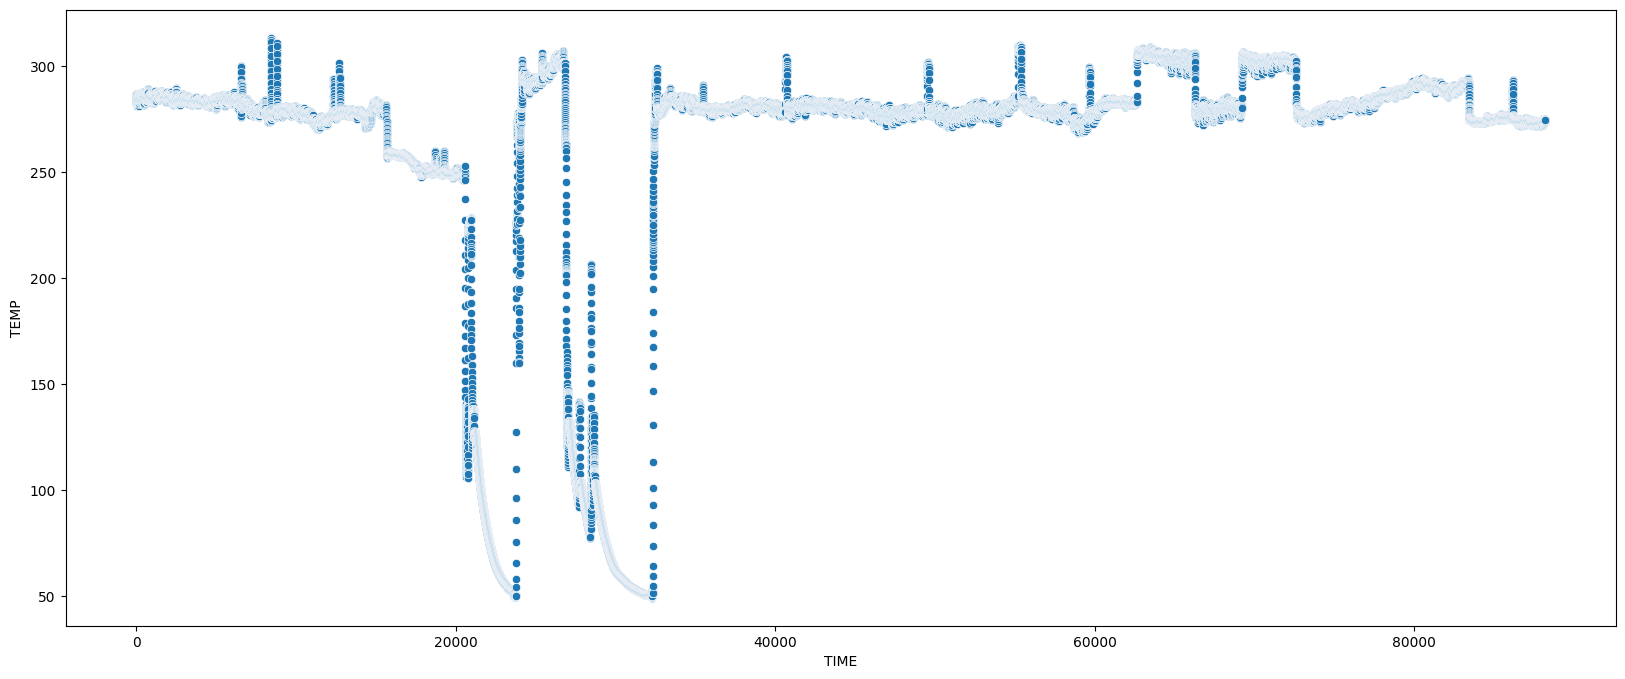

In [254]:
plt.figure(figsize = (20,8))
sns.scatterplot(x = 'TIME', y = 'TEMP', data = df)
plt.show()

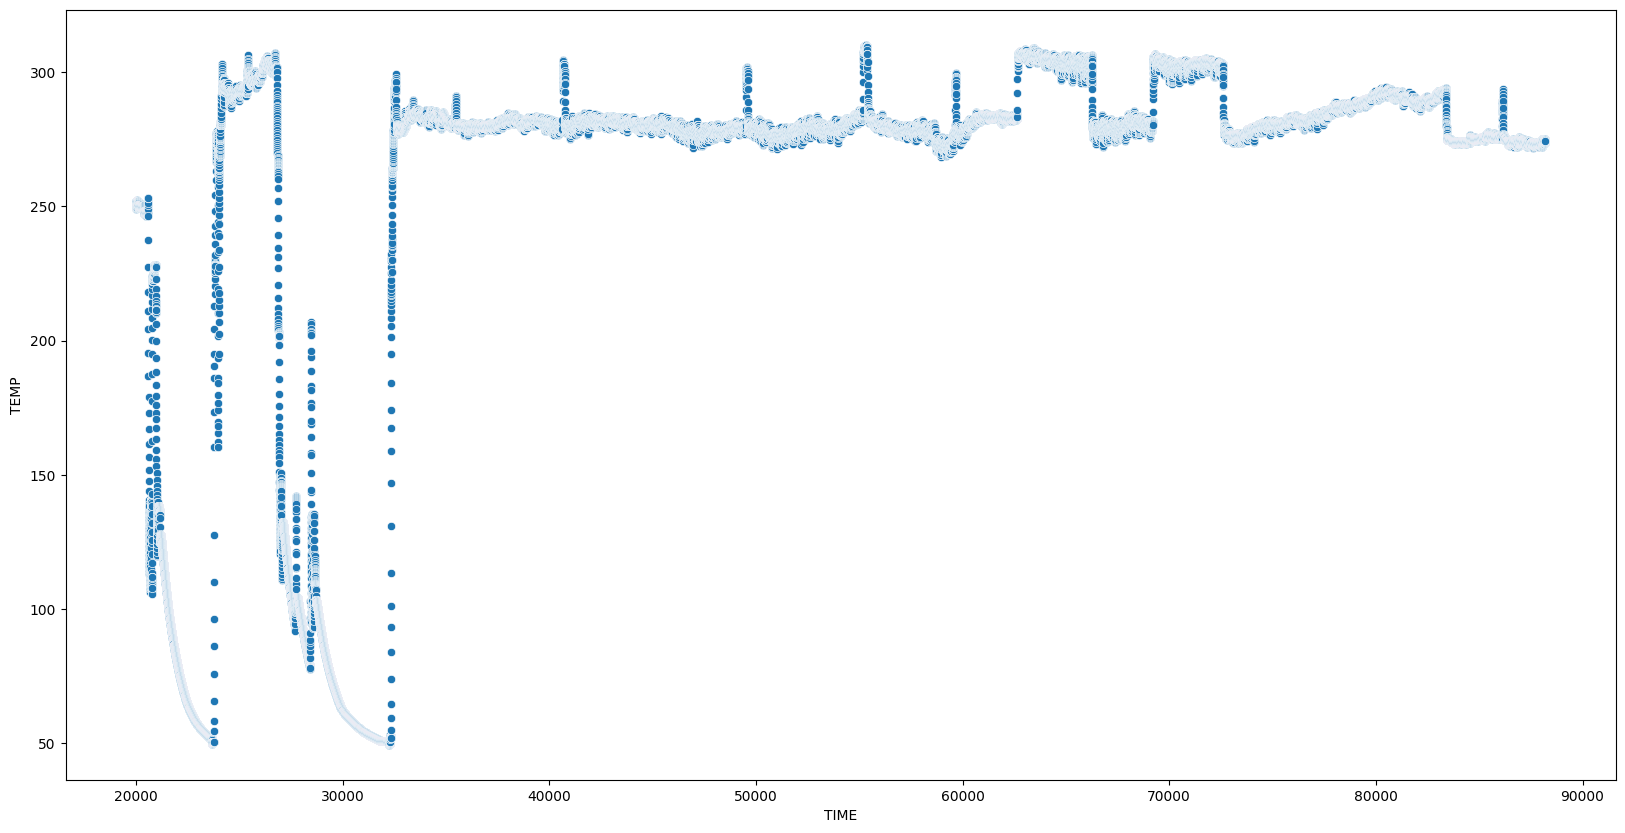

In [266]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = 'TIME', y = 'TEMP', data = df[20009:])
plt.show()

In [264]:
pd.set_option('display.max_rows', 200)

In [ ]:
df[23700:23900] # 126.782, 37.998 index : 20009

In [284]:
tmp_df = df.drop(df.index[20009:23787], axis = 0).reset_index()
tmp_df

,index,date,kst,TEMP,longitude,latitude,TIME
0,0,20230101,9:00,286.797,163.427467,28.531400,0
1,1,20230101,9:00,287.082,163.424783,28.531967,1
2,2,20230101,9:01,285.938,163.421917,28.532567,2
3,3,20230101,9:01,285.772,163.419217,28.532933,3
4,4,20230101,9:02,286.357,163.416517,28.533467,4
...,...,...,...,...,...,...,...
84411,88189,20230131,23:57,274.692,-81.480883,6.903217,88189
84412,88190,20230131,23:58,274.674,-81.478700,6.903250,88190
84413,88191,20230131,23:58,274.588,-81.476450,6.903300,88191
84414,88192,20230131,23:59,274.511,-81.474217,6.903317,88192


<Figure size 640x480 with 0 Axes>

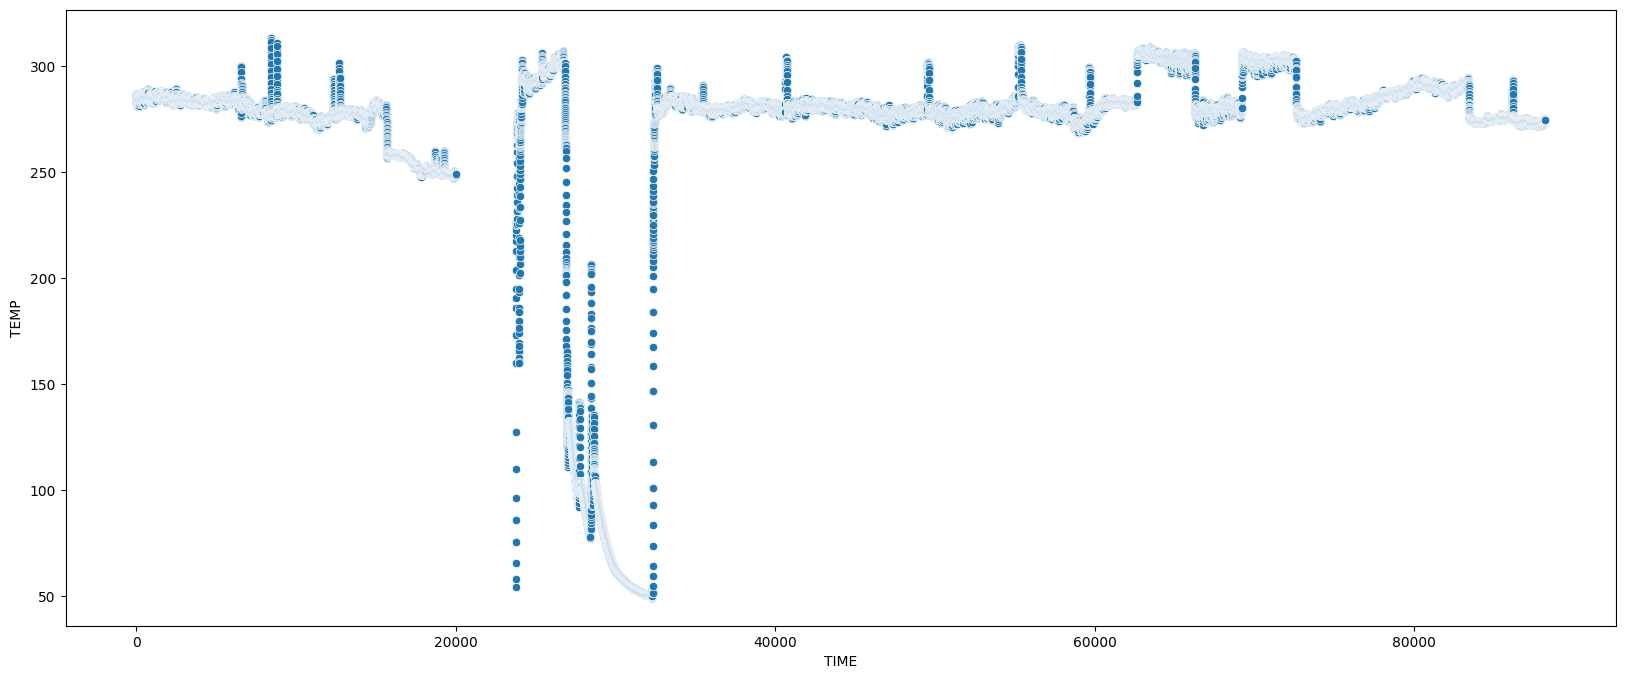

<Figure size 640x480 with 0 Axes>

In [285]:
plt.figure(figsize = (20,8))
sns.scatterplot(x = "TIME", y = 'TEMP', data = tmp_df)
plt.figure()